In [1]:
import numpy as np
import copy
from diffusion_maps import DiffusionMaps
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector
from datafold.dynfold import LocalRegressionSelection

## Part One

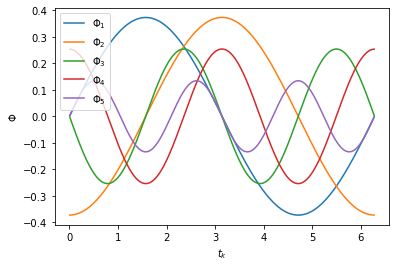

In [3]:
N = 1000
X = np.empty((N, 2))
t = (2*np.pi*np.arange(1, N+1)) / (N+1)
for k in range(N):
    X[k] = [np.cos(t[k]), np.sin(t[k])]

dm = DiffusionMaps()
new_matrix = dm.diffusionMaps(X, 5)

plt.figure()
for l in range(5):
    plt.plot(t, new_matrix[:, l], label=r'$\Phi_{}$'.format(l+1))
plt.legend(loc='upper left')
plt.xlabel(r'$t_k$')
plt.ylabel(r'$\Phi$')
plt.savefig('task2_1')
plt.show()

In [15]:
from scipy.fft import fft
xf = fft(X)
xf.shape

(1000, 2)

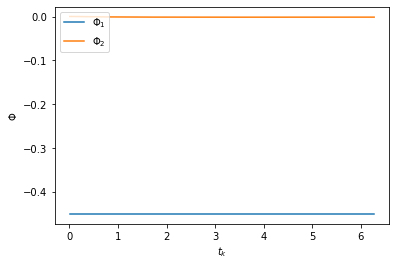

In [18]:
plt.figure()
for l in range(2):
    plt.plot(t, new_matrix[:, l], label=r'$\Phi_{}$'.format(l+1))
plt.legend(loc='upper left')
plt.xlabel(r'$t_k$')
plt.ylabel(r'$\Phi$')
plt.savefig('task2_1')
plt.show()

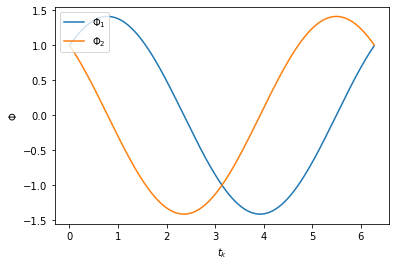

In [17]:
plt.figure()
for l in range(2):
    plt.plot(t, xf[:, l], label=r'$\Phi_{}$'.format(l+1))
plt.legend(loc='upper left')
plt.xlabel(r'$t_k$')
plt.ylabel(r'$\Phi$')
plt.savefig('task2_1')
plt.show()

## Part Two

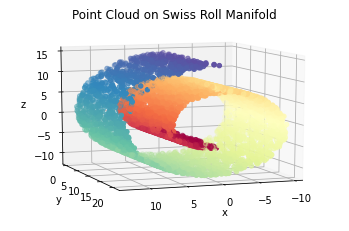

In [22]:
nr_samples = 5000
# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[idx_plot, 0], X[idx_plot, 1], X[idx_plot, 2], c=X_color[idx_plot], cmap=plt.cm.Spectral)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_title("Point Cloud on Swiss Roll Manifold");
ax.view_init(10,70)

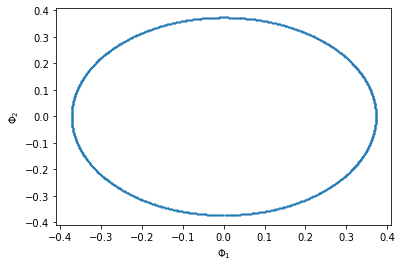

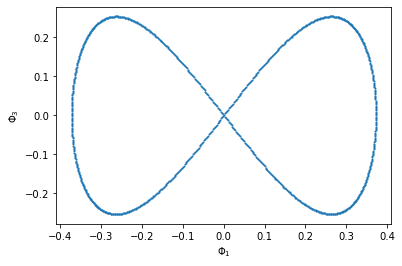

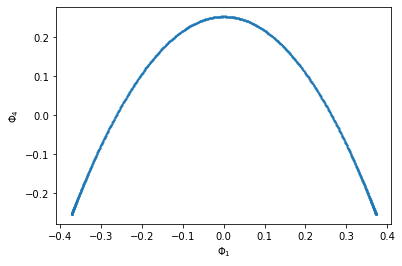

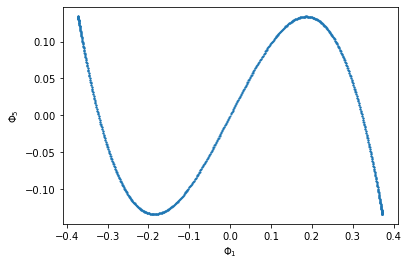

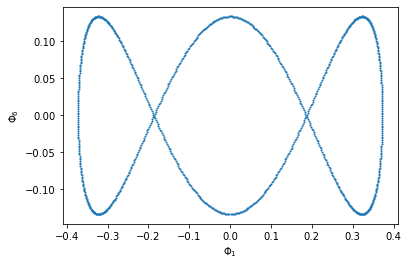

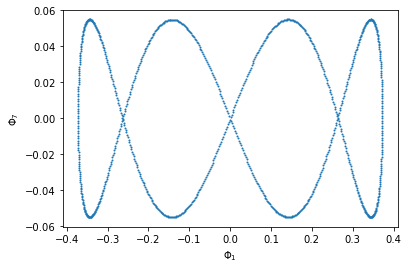

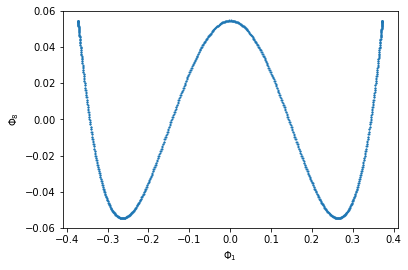

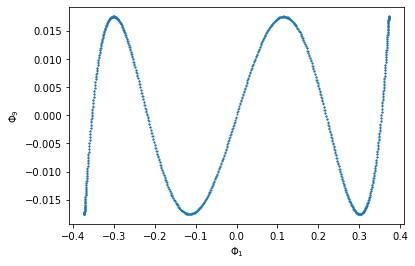

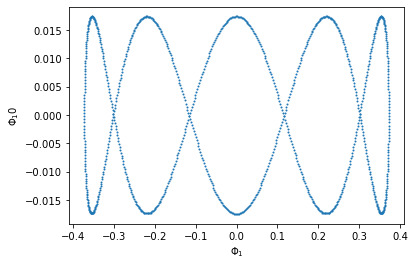

In [4]:
dm = DiffusionMaps()
new_matrix = dm.diffusionMaps(X, 10)

plt.figure()
for l in range(1, 10):
    plt.scatter(new_matrix[:, 0], new_matrix[:, l], marker='o', s=1)
    plt.ylabel('$\Phi_{}$'.format(l+1))
    plt.xlabel('$\Phi_1$')
    plt.savefig('task2_2_'+str(l+1))
    plt.show()

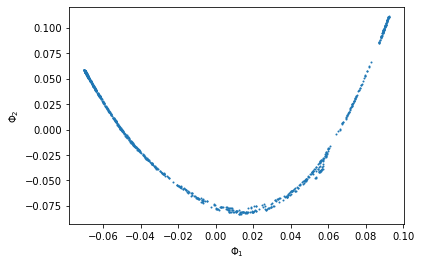

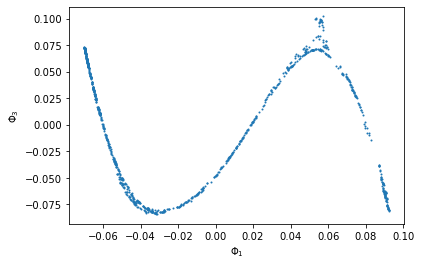

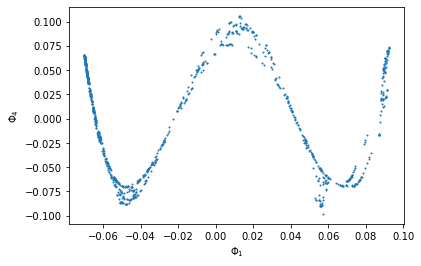

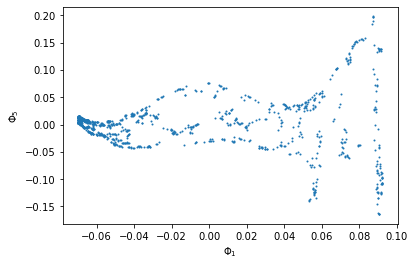

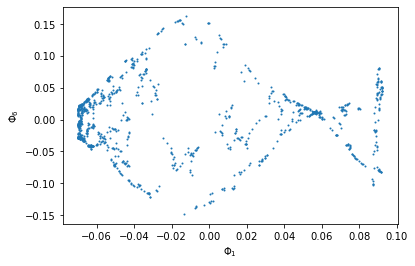

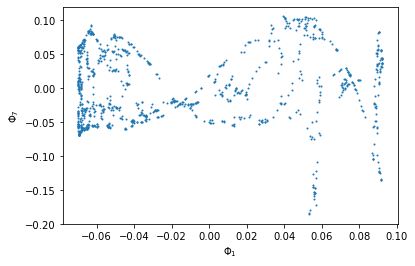

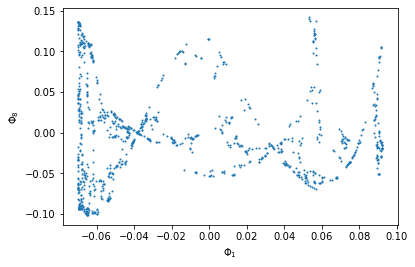

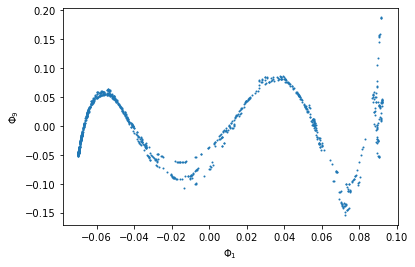

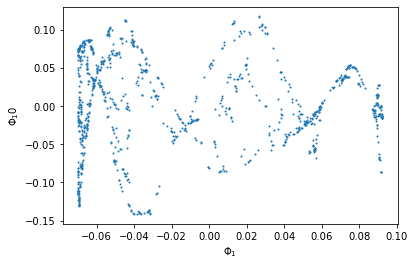

In [5]:
N = 1000
X = make_swiss_roll(N, random_state=7)[0]

dm = DiffusionMaps()
new_matrix = dm.diffusionMaps(X, 10)

plt.figure()
for l in range(1, 10):
    plt.scatter(new_matrix[:, 0], new_matrix[:, l], marker='o', s=1)
    plt.ylabel('$\Phi_{}$'.format(l+1))
    plt.xlabel('$\Phi_1$')
    plt.savefig('task2_2_'+str(l+1)+'_1000')
    plt.show()

## Part Three

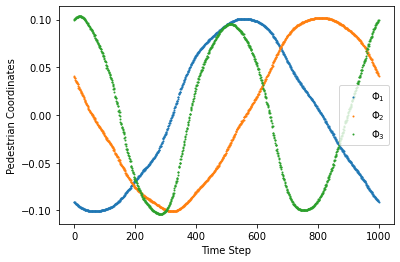

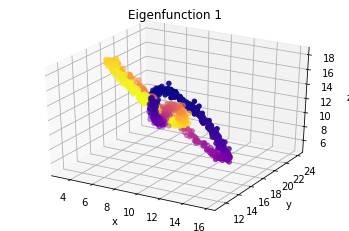

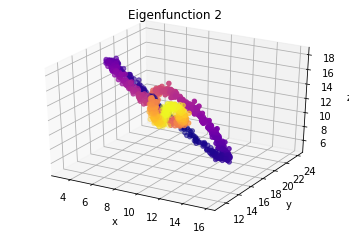

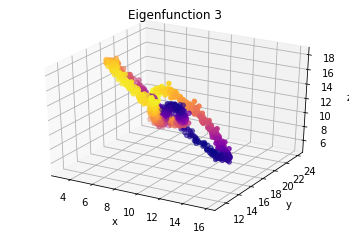

In [16]:
import pandas as pd
X = pd.read_csv('data_DMAP_PCA_vadere.txt', delimiter=" ", header=None).values
N, dim = X.shape
L = 3

dm = DiffusionMaps()
new_matrix = dm.diffusionMaps(X, L)

plt.figure()
for l, col in enumerate(new_matrix.T):
    plt.scatter(np.arange(N), col, label='$\Phi_{}$'.format(l + 1), s=1)
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Pedestrian Coordinates')
plt.savefig('task2_3')
plt.show()

for i in range(L):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=new_matrix[:, i], cmap='plasma')
    ax.set_title(f'Eigenfunction {i + 1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    fig.savefig('task2_3_'+str(i))
    fig.show()


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
pca.explained_variance_ratio_

array([0.47330561, 0.37594081, 0.14788461])